In [29]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import log_loss, pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity





In [34]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
print(train.shape)
print(test.shape)

(2345796, 3)


In [33]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
train[train['is_duplicate']==1].head()

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1


In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
train['question1'] = train['question1'].fillna("")
train['question2'] = train['question2'].fillna("")

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404290 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [21]:
count_vec = CountVectorizer()
tfidf_vec = TfidfVectorizer()
all_data = train['question1'].tolist() + train['question2'].tolist()
n = train.shape[0]

In [23]:
vec = tfidf_vec
x = vec.fit_transform(all_data)
print("features: {}".format(len(vec.vocabulary_)))
m_q1 = x[0:n]
print("matrix 1 shape :{}".format(m_q1.shape))

m_q2 = x[n:]
print("matrix 2 shape: {}".format(m_q2.shape))

features: 86153
matrix 1 shape :(404290, 86153)
matrix 2 shape: (404290, 86153)


In [76]:
dot_dist = m_q1.multiply(m_q2).sum(axis=1).tolist()

In [77]:
dot_dist

[[0.978515211673232],
 [0.749754597597516],
 [0.25467722793603603],
 [0.0],
 [0.2600641292107122],
 [0.49479976132457365],
 [0.0],
 [0.7606919932516155],
 [0.9672663717191486],
 [0.6061086630075538],
 [0.01885587929545232],
 [0.6278035764987553],
 [0.9446752329099883],
 [0.9501210491521035],
 [0.9424845748125352],
 [0.2424130663274358],
 [0.7498088487859806],
 [0.022653850211370567],
 [0.3843898760049059],
 [0.4713571446165651],
 [0.5536446235840529],
 [0.5115649342050598],
 [0.5999527555356048],
 [0.0],
 [0.20318255194612922],
 [0.7203300552814509],
 [0.7550086693060573],
 [0.4601201530757231],
 [0.7486960808537935],
 [0.5729410133820898],
 [0.550823419605201],
 [0.5050705678660377],
 [0.8559145095044772],
 [0.006652040493166769],
 [0.7436608753878036],
 [0.3959641517948937],
 [0.5356917003830339],
 [0.3461604852724101],
 [0.4008267913378646],
 [0.24078280873763236],
 [0.0],
 [0.9823596432034024],
 [0.817235998990844],
 [0.4958332904446355],
 [0.7485829554412519],
 [0.525828236515624]

In [115]:
df_=train.copy()

In [140]:
temp = pd.DataFrame(dot_dist,columns=['dp'])

df_['dp'] = temp['dp']

In [141]:
df_.to_csv('../data/train_sim.csv')

,is_duplicate,dp
is_duplicate,1.000000,0.173565
dp,0.173565,1.000000


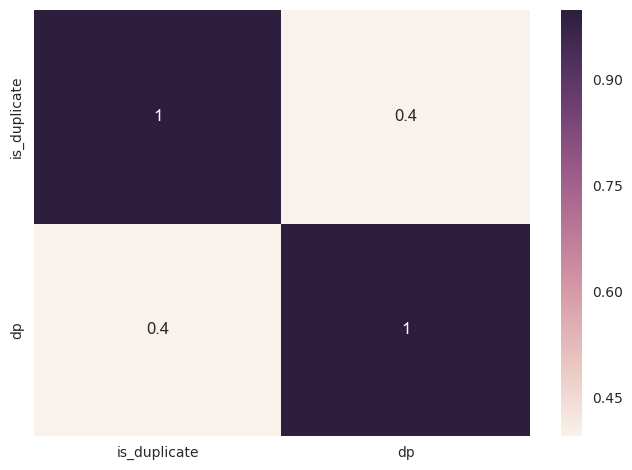

In [151]:
sns.heatmap(df_[:1000000][['is_duplicate','dp']].corr(),annot=True)


In [86]:
df=train.copy()[:10]

In [88]:

d = pairwise_distances(vec.transform(train['question1'][:10]),vec.transform(train['question2'][:10]),metric='cosine')
d


array([[ 0.02133285,  0.98273811,  0.9528826 ,  0.95648703,  0.97021035,
         0.97817945,  0.99191296,  0.97377757,  1.        ,  1.        ],
       [ 0.97750122,  0.25404298,  1.        ,  0.98826041,  1.        ,
         0.99479986,  0.99187353,  0.9902198 ,  0.97203079,  1.        ],
       [ 0.99101826,  0.98551181,  0.7470042 ,  0.99330399,  1.        ,
         1.        ,  1.        ,  1.        ,  0.96594894,  0.84378225],
       [ 1.        ,  1.        ,  0.96281252,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  0.98124105],
       [ 0.99142279,  1.        ,  1.        ,  1.        ,  0.74101835,
         0.98410986,  0.97098272,  1.        ,  0.97517563,  1.        ],
       [ 0.99471194,  0.99573499,  1.        ,  1.        ,  1.        ,
         0.51588537,  0.96486306,  0.99234009,  0.97538525,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  0.92586487

In [85]:
df

""


In [81]:
dist = pairwise_distances(m_q1[:10],m_q2[:10],metric='cosine')
# dist = pairwise_distances(m_q1,m_q2,metric='cosine')


In [92]:
from sklearn.metrics.pairwise import paired_cosine_distances
i=2
paired_cosine_distances(m_q1[i], m_q1[i])

array([ 0.])

In [17]:
train['question2'].tolist()[:10]

['What is the step by step guide to invest in share market?',
 'What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?',
 'How can Internet speed be increased by hacking through DNS?',
 'Find the remainder when [math]23^{24}[/math] is divided by 24,23?',
 'Which fish would survive in salt water?',
 "I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",
 'What keeps childern active and far from phone and video games?',
 'What should I do to be a great geologist?',
 'When do you use "&" instead of "and"?',
 'How do I hack Motorola DCX3400 for free internet?']

In [27]:
pairwise_distances(m_q1[:10], m_q2[:10], metric='euclidean')

array([[ 0.20729104,  1.40251367,  1.38163606,  1.38439282,  1.39281673,
         1.39876403,  1.40965441,  1.39581338,  1.41421356,  1.41421356],
       [ 1.39879941,  0.70745375,  1.41421356,  1.40635308,  1.41421356,
         1.41064461,  1.40962814,  1.40727857,  1.39498687,  1.41421356],
       [ 1.40832824,  1.40463825,  1.22091996,  1.40987699,  1.41421356,
         1.41421356,  1.41421356,  1.41421356,  1.39096058,  1.32554046],
       [ 1.41421356,  1.41421356,  1.38826273,  1.41421356,  1.41421356,
         1.41421356,  1.41421356,  1.41421356,  1.41421356,  1.40411996],
       [ 1.40806024,  1.41421356,  1.41421356,  1.41421356,  1.21649979,
         1.40330317,  1.3981717 ,  1.41421356,  1.39725408,  1.41421356],
       [ 1.41053223,  1.41122348,  1.41421356,  1.41421356,  1.41421356,
         1.00518679,  1.39456541,  1.40878917,  1.39727755,  1.41421356],
       [ 1.41421356,  1.41421356,  1.41421356,  1.41421356,  1.41421356,
         1.41421356,  1.41421356,  1.36415089

In [32]:
1-cosine_similarity(m_q1[0],m_q2[0])[0][0]

0.021484788326768367

In [28]:
pd.DataFrame(dist,columns=train['question2'].tolist()[:10],index=train['question1'].tolist()[:10])

,What is the step by step guide to invest in share market?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,How can Internet speed be increased by hacking through DNS?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",Which fish would survive in salt water?,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",What keeps childern active and far from phone and video games?,What should I do to be a great geologist?,"When do you use ""&"" instead of ""and""?",How do I hack Motorola DCX3400 for free internet?
What is the step by step guide to invest in share market in india?,0.021485,0.983522,0.954459,0.958272,0.969969,0.978270,0.993563,0.974148,1.000000,1.000000
What is the story of Kohinoor (Koh-i-Noor) Diamond?,0.978320,0.250245,1.000000,0.988914,1.000000,0.994959,0.993526,0.990216,0.972994,1.000000
How can I increase the speed of my internet connection while using a VPN?,0.991694,0.986504,0.745323,0.993877,1.000000,1.000000,1.000000,1.000000,0.967386,0.878529
Why am I mentally very lonely? How can I solve it?,1.000000,1.000000,0.963637,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985776
"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",0.991317,1.000000,1.000000,1.000000,0.739936,0.984630,0.977442,1.000000,0.976159,1.000000
Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,0.994801,0.995776,1.000000,1.000000,1.000000,0.505200,0.972406,0.992343,0.976192,1.000000
Should I buy tiago?,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.930454,1.000000,1.000000
How can I be a good geologist?,1.000000,1.000000,0.904911,1.000000,1.000000,1.000000,1.000000,0.239308,1.000000,0.982357
When do you use シ instead of し?,1.000000,1.000000,1.000000,0.943584,1.000000,1.000000,1.000000,0.959984,0.032734,0.969595
Motorola (company): Can I hack my Charter Motorolla DCX3400?,1.000000,1.000000,0.984749,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.393891


### submit cosine sim distance

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345796 entries, 0 to 2345795
Data columns (total 3 columns):
test_id      int64
question1    object
question2    object
dtypes: int64(1), object(2)
memory usage: 53.7+ MB


In [39]:
test['question1'] = test['question1'].fillna("")
test['question2'] = test['question2'].fillna("")

In [40]:
all_test_data = test['question1'].tolist() + test['question2'].tolist()
n = test.shape[0]

In [41]:
vec = tfidf_vec
x = vec.fit_transform(all_test_data)
print("features: {}".format(len(vec.vocabulary_)))
m_test_q1 = x[0:n]
print("matrix 1 shape :{}".format(m_q1.shape))

m_test_q2 = x[n:]
print("matrix 2 shape: {}".format(m_q2.shape))

features: 91323
matrix 1 shape :(404290, 86153)
matrix 2 shape: (404290, 86153)


In [50]:
res

[array([[ 0.2873038]]),
 array([[ 0.59466619]]),
 array([[ 0.67835843]]),
 array([[ 0.]]),
 array([[ 0.49438542]]),
 array([[ 0.26457589]]),
 array([[ 0.5921032]]),
 array([[ 0.2298922]]),
 array([[ 0.65327155]]),
 array([[ 0.36005286]])]

In [70]:
res = []
for i in range(len(test)):
    sim = cosine_similarity(m_test_q1[i], m_test_q2[i])[0][0]
    res.append(sim)
test['cos'] = res
    

In [75]:
test.to_csv('../data/test_cos.csv',index=False)

In [72]:
len(res)

2345796

In [98]:
test[test.cos<=0.2]['test_id'].count()/test['test_id'].count()

0.29525244309394338

In [152]:
test['is_duplicate'] = test['cos'].apply(lambda x: 1 if x >=0.69 else 0)


,test_id,question1,question2,cos,is_duplicate
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,0.287304,0
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,0.594666,0
2,2,What but is the best way to send money from Ch...,What you send money to China?,0.678358,0
3,3,Which food not emulsifiers?,What foods fibre?,0.000000,0
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,0.494385,0


In [157]:
test[['test_id','is_duplicate']].to_csv('../data/submition_base.csv',index=False)

In [153]:
test.head(50)

,test_id,question1,question2,cos,is_duplicate
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,0.287304,0
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,0.594666,0
2,2,What but is the best way to send money from Ch...,What you send money to China?,0.678358,0
3,3,Which food not emulsifiers?,What foods fibre?,0.000000,0
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,0.494385,0
5,5,How are the two wheeler insurance from Bharti ...,I admire I am considering of buying insurance ...,0.264576,0
6,6,How can I reduce my belly fat through a diet?,How can I reduce my lower belly fat in one month?,0.592103,0
7,7,"By scrapping the 500 and 1000 rupee notes, how...",How will the recent move to declare 500 and 10...,0.229892,0
8,8,What are the how best books of all time?,What are some of the military history books of...,0.653272,0
9,9,After 12th years old boy and I had sex with a ...,Can a 14 old guy date a 12 year old girl?,0.360053,0


In [104]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


D:\MyProgramFiles\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


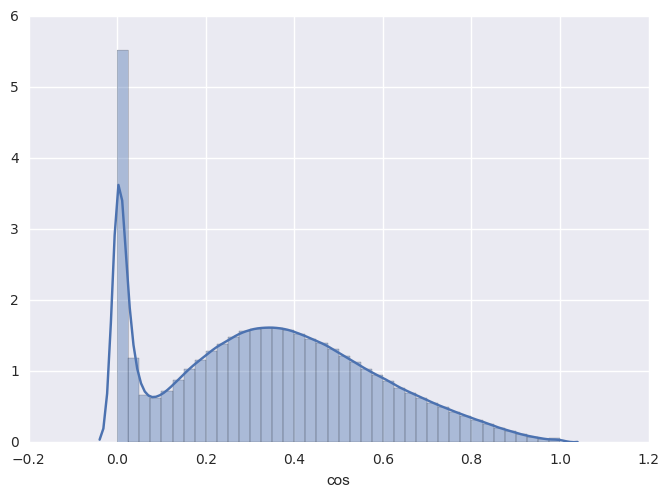

In [112]:
sns.distplot(test['cos'],bins=40)

D:\MyProgramFiles\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


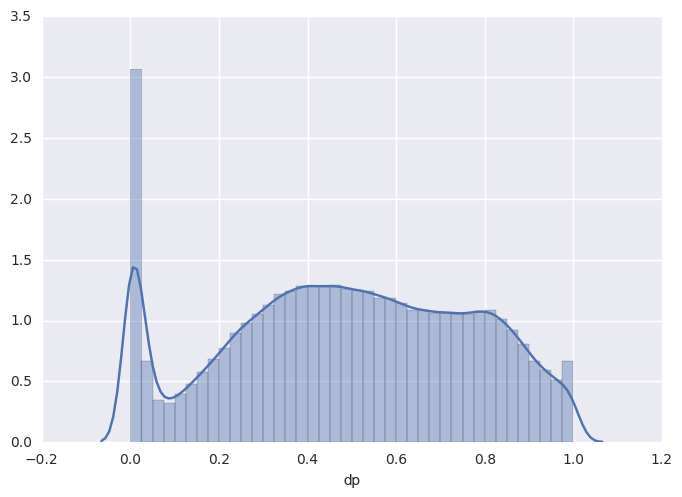

In [158]:
sns.distplot(df_['dp'],bins=40,)

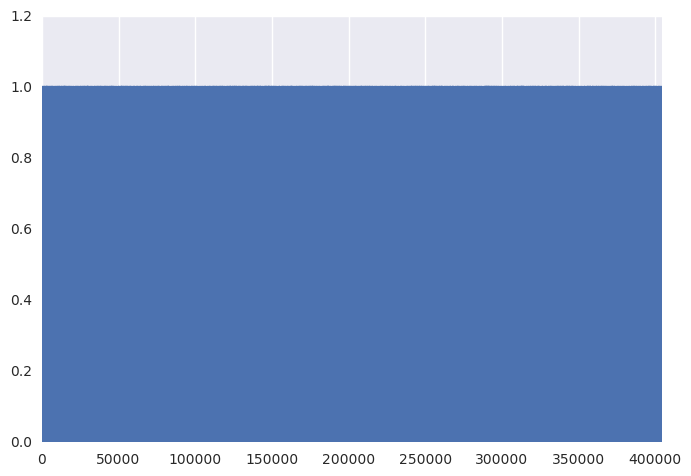

In [159]:
df_['dp'].plot()

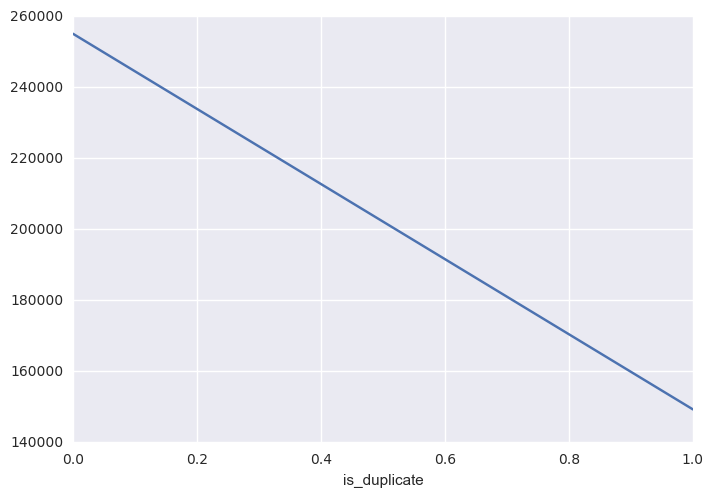

In [163]:
df_.groupby('is_duplicate').count()['dp'].plot()

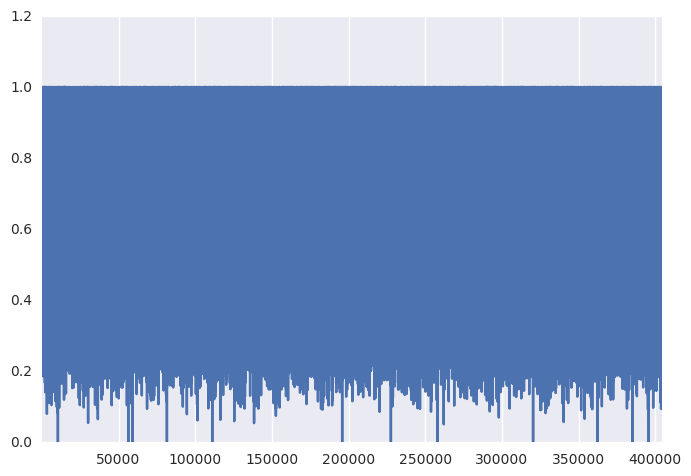

In [166]:
df_[df_['is_duplicate']==1]['dp'].plot()

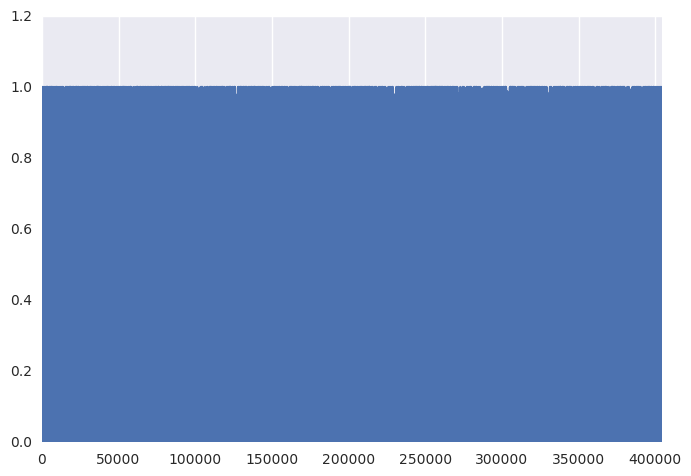

In [168]:
df_[df_['is_duplicate']==0]['dp'].plot()